<a href="https://colab.research.google.com/github/aidanpholland/Machine-Learning-and-Molecules/blob/main/NN_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sbn

In [ ]:
X_and_y = [[0,0,0], [0,1,1], [1,0,1], [1,1,0]]
data = pd.DataFrame(X_and_y, columns = ['X1', 'X2', 'y'])


<Axes: xlabel='X1', ylabel='X2'>

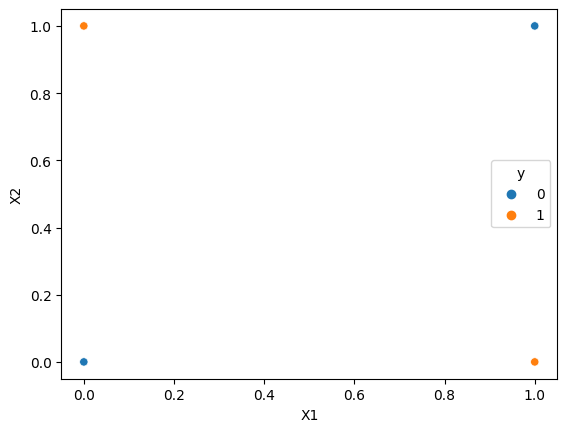

In [ ]:
sbn.scatterplot(x = 'X1', y = 'X2', hue = 'y', data = data)

In [ ]:
def activation(x):
  act = 1/(1 + np.exp(-x))
  return act
# this function receives an input value and decides whether that value becomes a 0 or a 1 (close)

def d_activation(x):
  d_act = x * (1 - x)
  return d_act
# for backpropagation in order to get a more fitting program using gradient

In [ ]:
X = data[['X1', 'X2']]
N = len(X)
print(N)
ones = np.ones((1,N))
Xp = np.concatenate((ones.T, X), axis=1)
# this somehow creates a proper matrix by combining ones with the coordinates
y = data['y']
y = y.values.reshape(1,-1)

np.random.seed(0)
wih = 2 * np.random.rand(2,3) - 1
# 2 sets of 3 for input hidden given that we have to produce 2 hidden nodes
who = 2 * np.random.rand(1,3) - 1
# 1 set of 3 for hidden given that we have to produce 1 output node

epochs = 100000
learning_rate = 0.1
for epoch in range(epochs):
  Xih = wih @ Xp.T
  # above creates a matrix of x and w
  yh = activation(Xih)
  # at this point we have two yhiddens for each node
  yh = np.concatenate((ones, yh))
  # a vector is created here with 3 values, the first being a 1
  Xho = who @ yh
  y_predicted = activation(Xho)
  error = y - y_predicted
  error_hidden = (error * d_activation(y_predicted)).T @ who[:,1:]
  # [:,1:] removes the first term of a matrix, this is necessary because w0ho is not included?

  gradient_ho = -(1/N) * (error * d_activation(y_predicted)) @ yh.T
  gradient_ih = -(1/N) * (error_hidden.T * d_activation(yh[1:,:])) @ Xp

  who = who - learning_rate * gradient_ho
  wih = wih - learning_rate * gradient_ih

  if epoch%(epochs/10) == 0:
    L2 = 0.5*np.mean(error**2)
    print(epoch,L2)

print(y_predicted)

4
0 0.1448906249407177
10000 0.12362618330956573
20000 0.08822559544292743
30000 0.017657706448471318
40000 0.0049403001931577145
50000 0.0026579953968853182
60000 0.001780972439476808
70000 0.0013274367833144248
80000 0.001053121729420891
90000 0.0008703411750901073
[[0.03995776 0.96451706 0.96458809 0.04257507]]


In [ ]:
data['y_predicted'] = y_predicted[0]
data

,X1,X2,y,y_predicted
0,0,0,0,0.039958
1,0,1,1,0.964517
2,1,0,1,0.964588
3,1,1,0,0.042575


In [ ]:
wih

array([[-3.01425729,  6.81166114,  6.77515438],
       [ 7.24034885, -4.84113888, -4.83441662]])

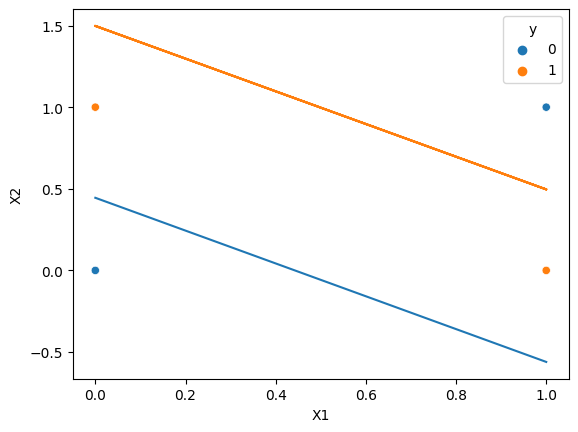

In [ ]:
sbn.scatterplot(x = 'X1', y = 'X2', hue = 'y', data = data)
decision_boundary1 = -(wih[0][0] + wih[0][1]*data['X1'])/(wih[0][2])
decision_boundary2 = -(wih[1][0] + wih[1][1]*data['X2'])/(wih[1][2])
plt.plot(data['X1'],decision_boundary1)
plt.plot(data['X2'],decision_boundary2)